In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from time import time

In [2]:
df = pd.read_csv('fifa19.csv', encoding='utf-8')
df.sample(3)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
14571,14571,244449,E. Cerna,20,https://cdn.sofifa.org/players/4/19/244449.png,Mexico,https://cdn.sofifa.org/flags/83.png,61,74,Tigres U.A.N.L.,...,55.0,27.0,30.0,33.0,8.0,10.0,11.0,11.0,8.0,€1.1M
12136,12136,245008,M. Haas,22,https://cdn.sofifa.org/players/4/19/245008.png,Austria,https://cdn.sofifa.org/flags/4.png,63,69,SKN St. Pölten,...,56.0,56.0,63.0,58.0,12.0,11.0,12.0,9.0,7.0,€701K
981,981,226378,R. Ábila,28,https://cdn.sofifa.org/players/4/19/226378.png,Argentina,https://cdn.sofifa.org/flags/52.png,77,77,Boca Juniors,...,72.0,35.0,23.0,22.0,16.0,14.0,15.0,14.0,15.0,€12.6M


In [3]:
df.shape

(18207, 89)

In [4]:
def more_than(column=["Overall", "Potential"], 
                        x=(0,100,1)):
    return df.loc[df[column] > x]

In [5]:
df.keys()

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [6]:
df.SprintSpeed.head()

0    86.0
1    91.0
2    90.0
3    58.0
4    76.0
Name: SprintSpeed, dtype: float64

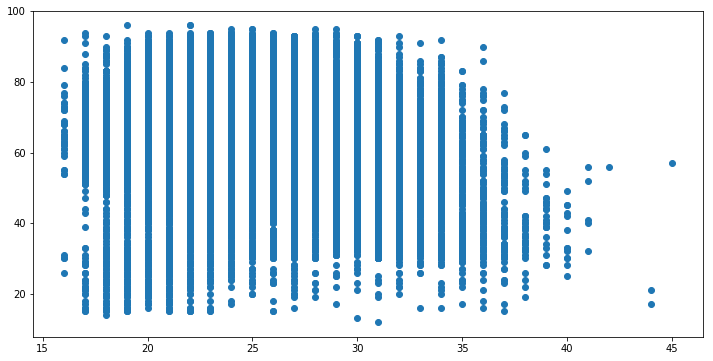

In [7]:
plt.figure(figsize=(12,6))
plt.scatter(df['Age'], df['SprintSpeed'])

In [8]:
age_freq = df.groupby('Age')['Age'].count()
age_freq[:5]

Age
16      42
17     289
18     732
19    1024
20    1240
Name: Age, dtype: int64

<BarContainer object of 29 artists>

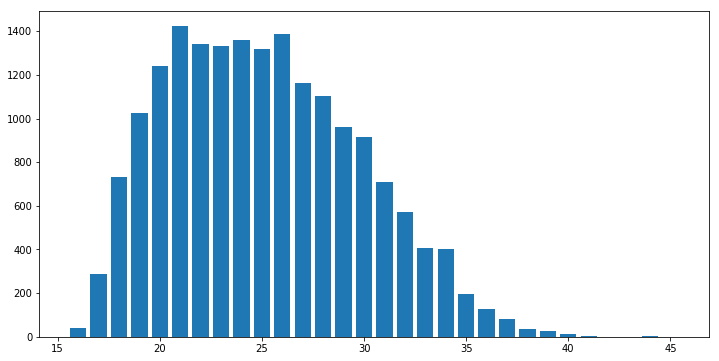

In [9]:
age_index = age_freq.index
plt.figure(figsize=(12,6))
plt.bar(age_index, age_freq)

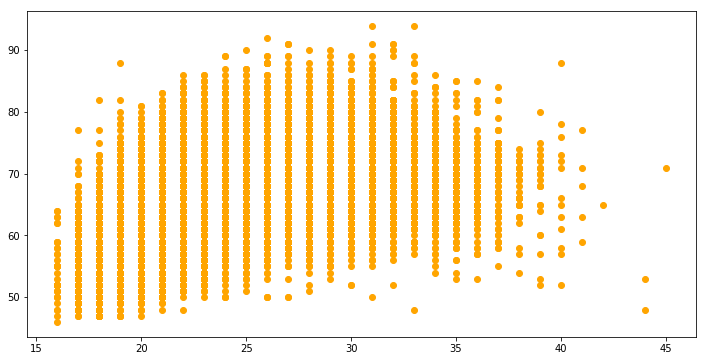

In [10]:
age = df['Age']
overall = df['Overall']
plt.figure(figsize=(12,6))
plt.scatter(age, overall, color='orange')
plt.show()

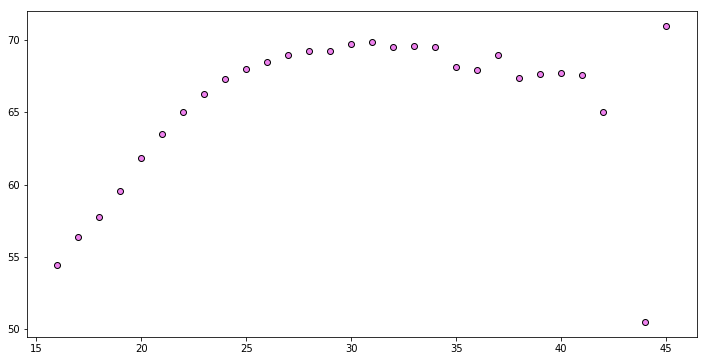

In [11]:
overall_by_age = df.groupby('Age')['Overall'].mean()
overall_index = overall_by_age.index
plt.figure(figsize=(12,6))
plt.scatter(overall_index, overall_by_age, color='violet', edgecolor='k')

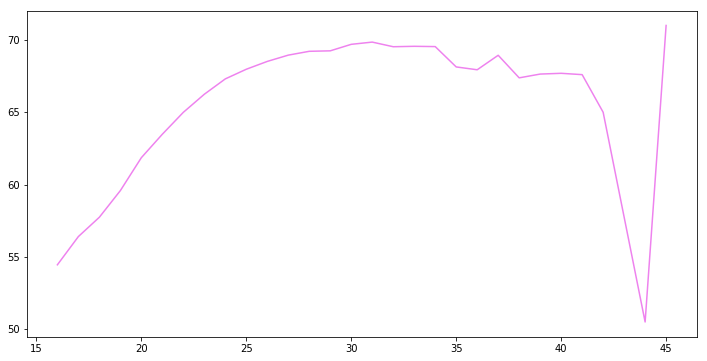

In [12]:
plt.figure(figsize=(12,6))
plt.plot(overall_by_age, color='violet')

In [13]:
df[df['Age']>=45]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
4741,4741,140029,O. Pérez,45,https://cdn.sofifa.org/players/4/19/140029.png,Mexico,https://cdn.sofifa.org/flags/83.png,71,71,Pachuca,...,62.0,23.0,12.0,11.0,70.0,64.0,65.0,73.0,74.0,€272K


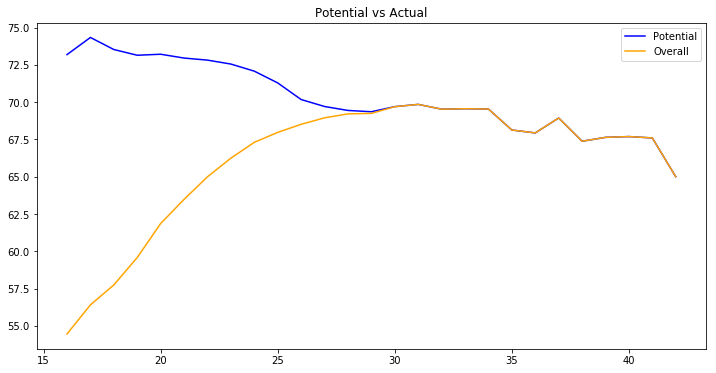

In [14]:
rob_df = df[df['Age']<43]

potential = rob_df.groupby('Age').Potential.mean()
overall = rob_df.groupby('Age').Overall.mean()

plt.figure(figsize=(12,6))
plt.plot(potential, color='blue')
plt.plot(overall, color='orange')
plt.title("Potential vs Actual")
plt.legend()

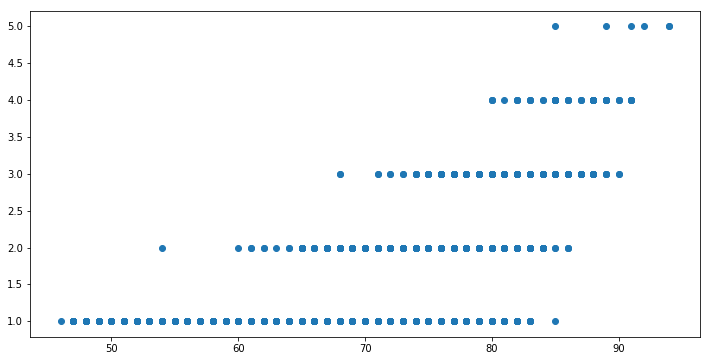

In [15]:
overall = rob_df['Overall']
rep = rob_df['International Reputation']

plt.figure(figsize=(12,6))
plt.scatter(overall, rep)

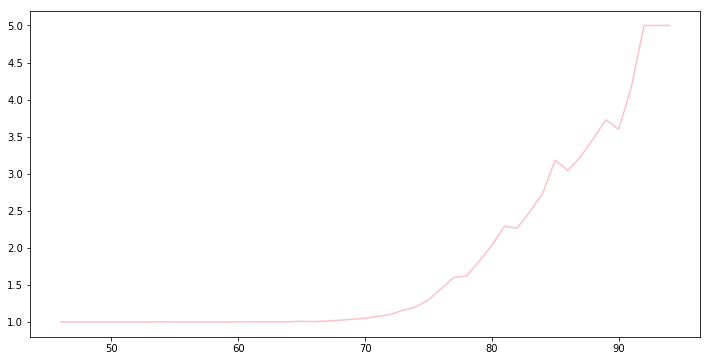

In [16]:
overall = rob_df.groupby('Overall')['International Reputation'].mean()

plt.figure(figsize=(12,6))
plt.plot(overall, color='pink')

## By Nationality

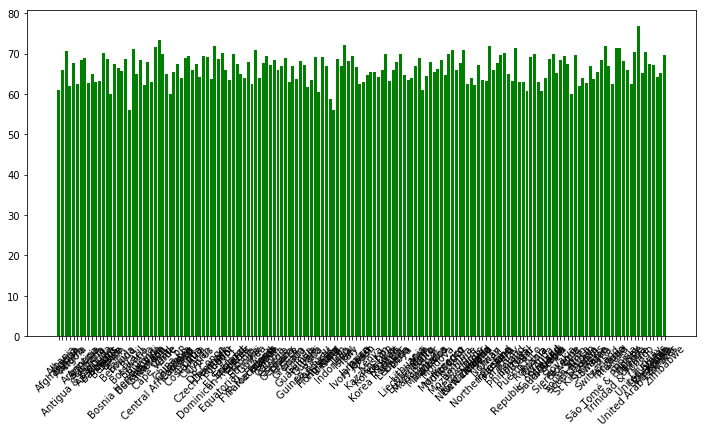

In [17]:
overall_nation = rob_df.groupby("Nationality").Overall.mean()

plt.figure(figsize=(12,6))
plt.bar(overall_nation.index, overall_nation, color='green')
plt.xticks(rotation=45)
plt.show()

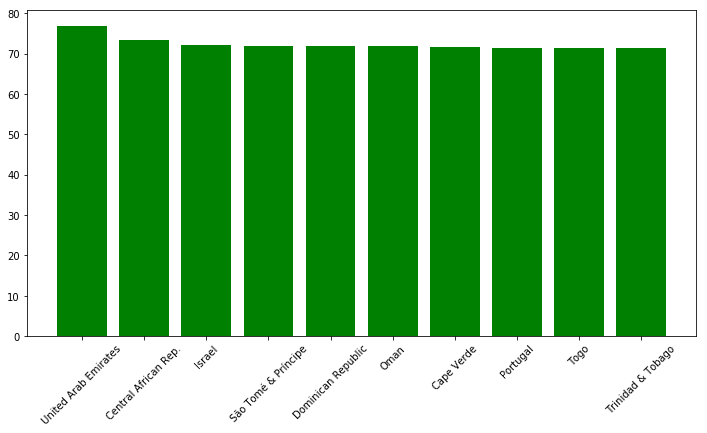

In [18]:
top10_val = overall_nation.sort_values(ascending=False)[:10]
top10_ind = top10_val.index

plt.figure(figsize=(12,6))
plt.bar(top10_ind, top10_val, color='green')
plt.xticks(rotation=45)
plt.show()

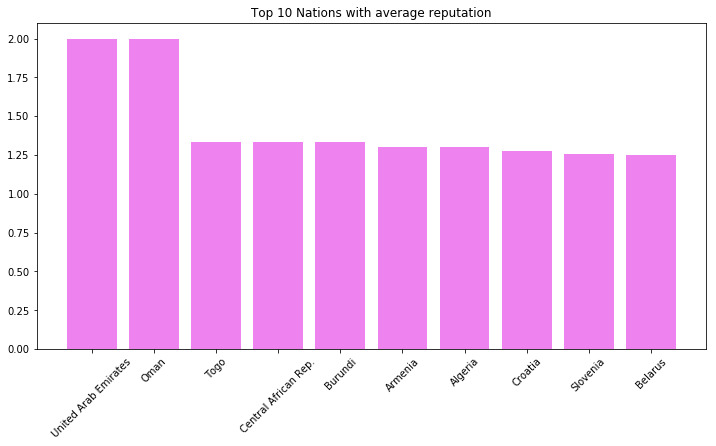

In [19]:
rep_nation = rob_df.groupby("Nationality")["International Reputation"].mean()
top_rep_nation = rep_nation.sort_values(ascending=False)[:10]

plt.figure(figsize=(12,6))
plt.bar(top_rep_nation.index, top_rep_nation, color='violet')
plt.xticks(rotation=45)
plt.title("Top 10 Nations with average reputation")
plt.show()

## Take 2

In [20]:
rob_df.keys()

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

Text(0.5, 1.0, 'Age-Agility')

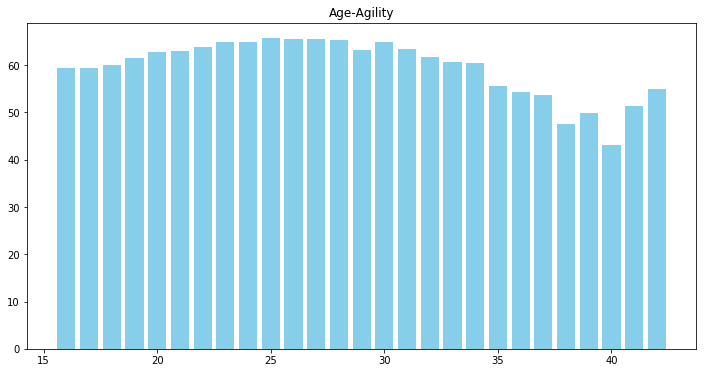

In [21]:
agi = rob_df.groupby('Age')['Agility'].mean()

plt.figure(figsize=(12,6))
plt.bar(agi.index, agi, color='skyblue')
plt.title('Age-Agility')

Text(0.5, 1.0, 'Age-Speed')

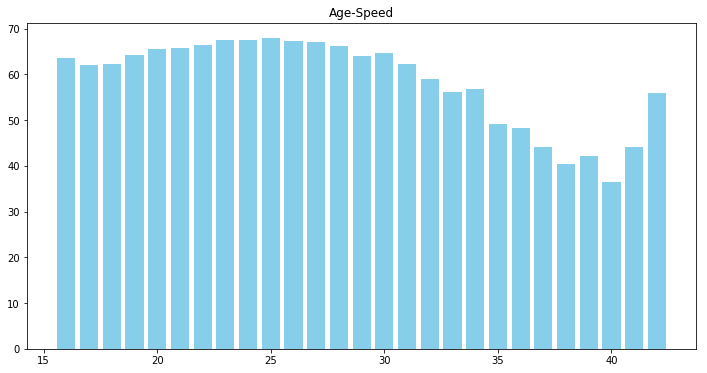

In [22]:
agi = rob_df.groupby('Age')['SprintSpeed'].mean()

plt.figure(figsize=(12,6))
plt.bar(agi.index, agi, color='skyblue')
plt.title('Age-Speed')

Text(0.5, 1.0, 'Age and SprintSpeed')

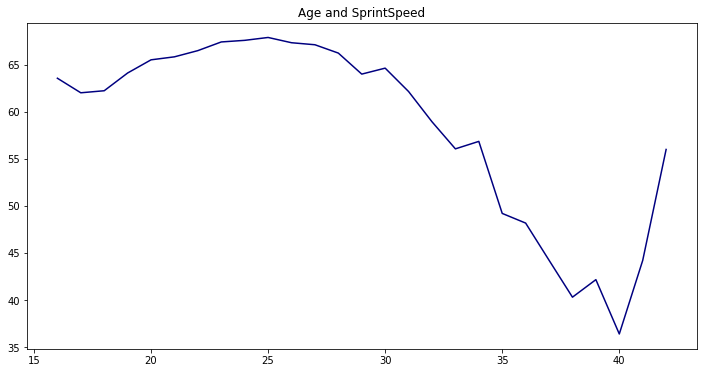

In [23]:
plt.figure(figsize=(12,6))
plt.plot(agi, color='navy')
plt.title('Age and SprintSpeed')

In [24]:
rob_df.keys()

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

Text(0.5, 1.0, 'Ball Control Over Age Groups')

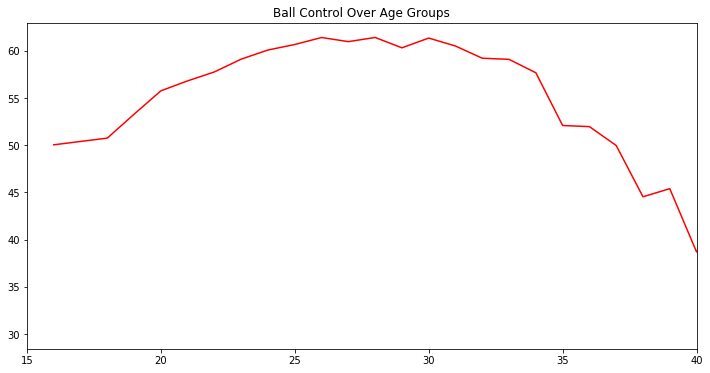

In [25]:
mean_ball = rob_df.groupby("Age")['BallControl'].mean()

plt.figure(figsize=(12,6))
plt.plot(mean_ball, color='red')
plt.xlim(15, 40)
plt.title("Ball Control Over Age Groups")

Text(0.5, 1.0, 'Shot Power Over Age Groups')

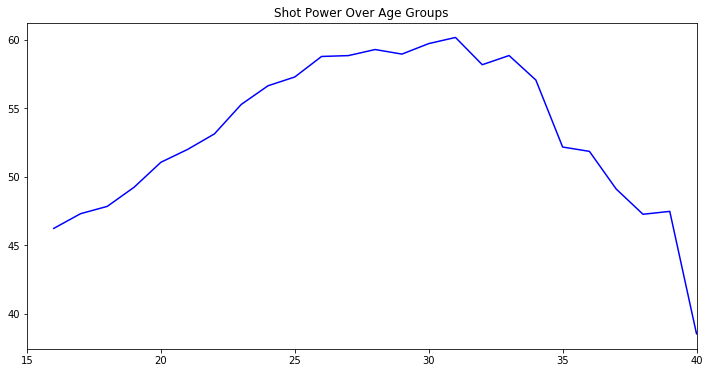

In [26]:
mean_shotpower = rob_df.groupby("Age")['ShotPower'].mean()

plt.figure(figsize=(12,6))
plt.plot(mean_shotpower, color='blue')
plt.xlim(15, 40)
plt.title("Shot Power Over Age Groups")

In [27]:
def over_age(df, column):
    means = df.groupby("Age")[column].mean()
    
    plt.figure(figsize=(12,6))
    plt.plot(means, color='blue')
    plt.xlim(15, 40)
    plt.title("{0} Over Age Groups".format(column))

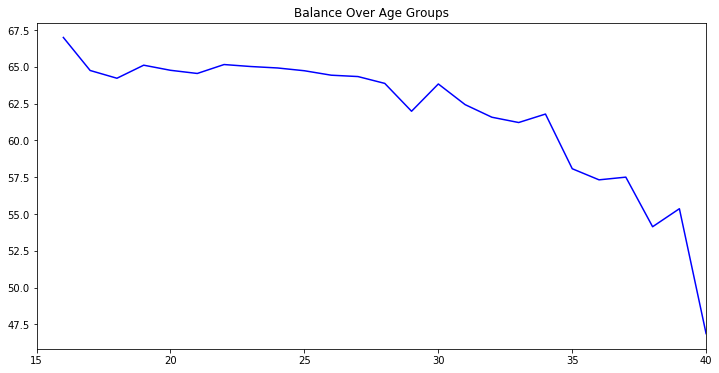

In [28]:
over_age(rob_df, "Balance")

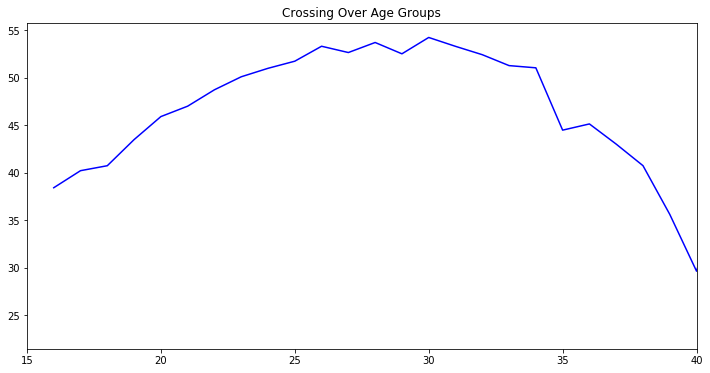

In [29]:
over_age(rob_df, "Crossing")

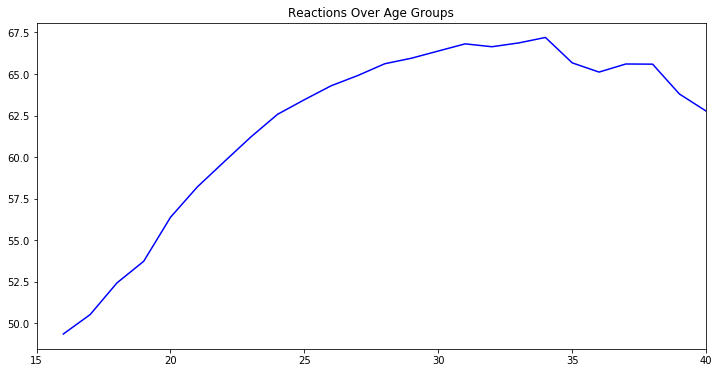

In [30]:
over_age(rob_df, 'Reactions')

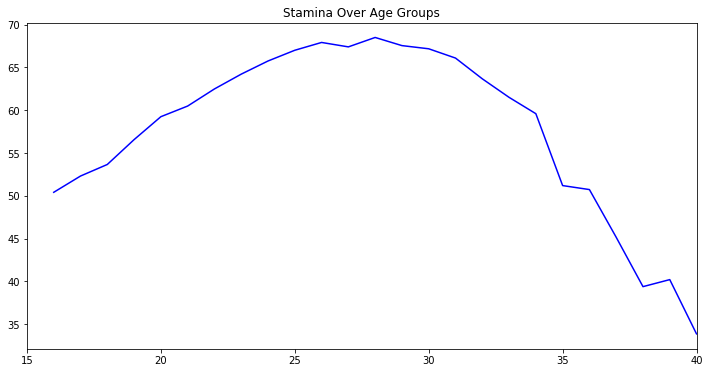

In [31]:
over_age(rob_df, "Stamina")

In [32]:
rob_df.head(3)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


In [33]:
df = rob_df.drop(columns=["Unnamed: 0"])
df[df['Name']=="Cristiano Ronaldo"]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


In [34]:
rob_df[rob_df['Name']=='Cristiano Ronaldo']['Age'].values[0]

33

In [39]:
rob_df[['Name','Finishing', 'Dribbling', 'BallControl', 'SprintSpeed', 'ShortPassing', 'Reactions', 'Balance', 'Stamina', 'Vision']]

,Name,Finishing,Dribbling,BallControl,SprintSpeed,ShortPassing,Reactions,Balance,Stamina,Vision
0,L. Messi,95.0,97.0,96.0,86.0,90.0,95.0,95.0,72.0,94.0
1,Cristiano Ronaldo,94.0,88.0,94.0,91.0,81.0,96.0,70.0,88.0,82.0
2,Neymar Jr,87.0,96.0,95.0,90.0,84.0,94.0,84.0,81.0,87.0
3,De Gea,13.0,18.0,42.0,58.0,50.0,90.0,43.0,43.0,68.0
4,K. De Bruyne,82.0,86.0,91.0,76.0,92.0,91.0,77.0,90.0,94.0
5,E. Hazard,84.0,95.0,94.0,88.0,89.0,90.0,94.0,83.0,89.0
6,L. Modrić,72.0,90.0,93.0,72.0,93.0,90.0,94.0,89.0,92.0
7,L. Suárez,93.0,87.0,90.0,75.0,82.0,92.0,83.0,90.0,84.0
8,Sergio Ramos,60.0,63.0,84.0,75.0,78.0,85.0,66.0,84.0,63.0
9,J. Oblak,11.0,12.0,16.0,60.0,29.0,86.0,49.0,41.0,70.0


In [37]:
def bar_stats(df, player):
    peer = df[df['Name']==player]['Age'].values[0]
    playerdf = df[df['Name']==player]
    peerdf = df[df['Age']==peer]
      
    N = 9
    one = playerdf[['Finishing', 'Dribbling', 'BallControl', 'SprintSpeed', 'ShortPassing', 'Reactions', 'Balance', 'Stamina', 'Vision']]

    fig, ax = plt.subplots()

    ind = np.arange(N)    # the x locations for the groups
    width = 0.35         # the width of the bars
    p1 = ax.bar(ind, one, width)


    two = peerdf[['Finishing', 'Dribbling', 'BallControl', 'SprintSpeed', 'ShortPassing', 'Reactions', 'Balance', 'Stamina', 'Vision']].mean()
    p2 = ax.bar(ind + width, two, width)

    ax.set_title('{0} vs Peers'.format(player))
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(['Finishing', 'Dribbling', 'BallControl', 'SprintSpeed', 'ShortPassing', 'Reactions', 'Balance', 'Stamina', 'Vision'])

    ax.legend((p1[0], p2[0]), (player, 'Peer'))
    ax.yaxis.set_units(inch)
    ax.autoscale_view()


### Relation Between SprintSpeed and Dribble

Text(0, 0.5, 'Dribbling')

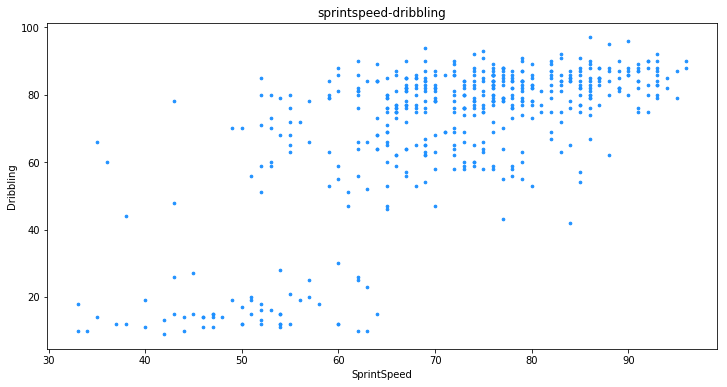

In [41]:
plt.figure(figsize=(12,6))
plt.scatter(rob_df['SprintSpeed'][:500], rob_df['Dribbling'][:500], c='dodgerblue', s=7)
plt.title("sprintspeed-dribbling")
plt.xlabel("SprintSpeed")
plt.ylabel("Dribbling")